In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
db = pd.read_csv("diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
db.describe()

In [7]:
db.shape

(768, 9)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


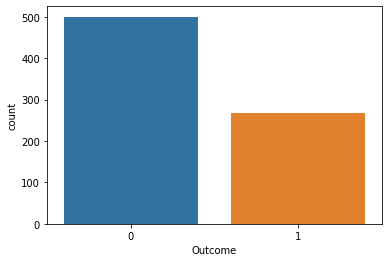

In [8]:
sns.countplot(db['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48d647abe0>,
      dtype=object)

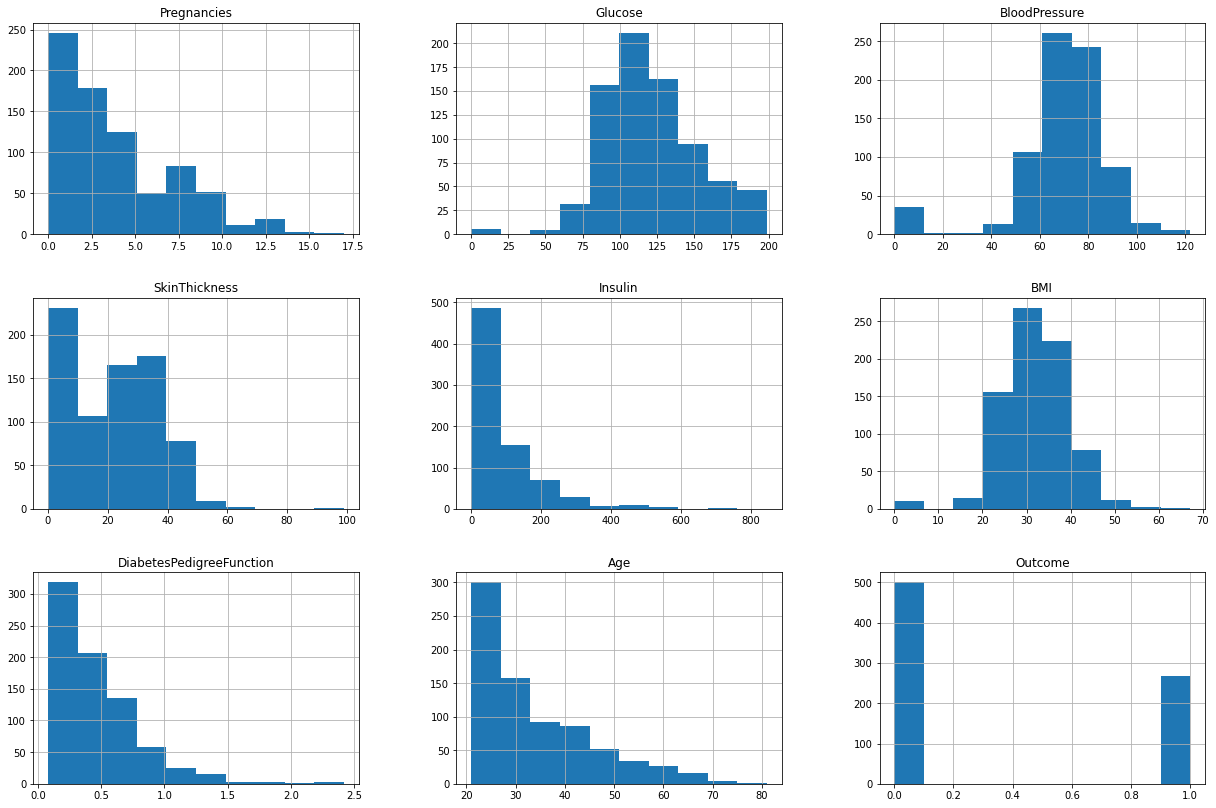

In [10]:
db.hist(figsize=(21,14))

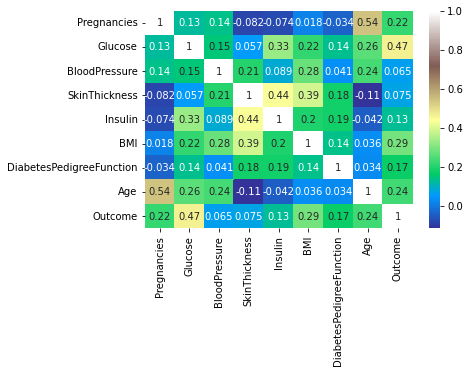

In [28]:
sns.heatmap(db.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
plt.show()

In [15]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
y = db['Outcome']
X = db.drop(['Outcome'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

#Model Training

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Decision Tree')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print('kNN')
print(accuracy_score(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

#SVM
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print('SVM')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred_svc,y_test))

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression')
print(accuracy_score(y_pred_lr,y_test))
print(confusion_matrix(y_pred_lr,y_test))

#Native Bays
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print('Native Bays')
print(accuracy_score(y_pred_nb,y_test))
print(confusion_matrix(y_pred_nb,y_test))

#Random Forest
rf = RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_pred_rf,y_test))
print(confusion_matrix(y_pred_rf,y_test))

Decision Tree
0.6883116883116883
[[77 29]
 [19 29]]
kNN
0.7337662337662337
[[77 22]
 [19 36]]
SVM
0.6883116883116883
[[84 26]
 [12 32]]
Logistic Regression
0.7987012987012987
[[85 20]
 [11 38]]
Native Bays
0.7987012987012987
[[82 17]
 [14 41]]
Random Forest
0.7272727272727273
[[83 29]
 [13 29]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_embedding = RandomTreesEmbedding(n_estimators=10,max_depth=3)
rt_model = make_pipeline(rt_embedding,LogisticRegression(max_iter=1000))
rt_model.fit(X_train,y_train)
y_pred_rt_model = rt_model.predict(X_test)
accuracy_score(y_pred_rt_model,y_test)

0.6948051948051948

In [49]:
#Thus, Native Bays and Logistic Regression is best algorithm to predict diabetes
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

lr = LogisticRegression(max_iter=750)
c_space = np.logspace(5,10,15)
param_grid = {'C':c_space}
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
 
lr_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
pred_grid_lr = lr_cv.predict(X_test)

Tuned Logistic Regression Parameters: {'C': 100000.0}


In [50]:
print(accuracy_score(y_test,pred_grid_lr))

0.7857142857142857


In [ ]:
#Thus Regular logistic regression and Guassian Native Bays is best